 1. Import data and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
stim = np.genfromtxt('MDA1_data/stim.txt')
spikes = np.genfromtxt('MDA1_data/spikes.txt')

In [3]:
spikes.shape

(25, 42600)

2. Reshape response data into response matrix

In [4]:
tau = 30
N_train = 1000
R_train = np.empty([N_train, 2*tau*25+1])
for cell in range(25):
    R_train[:,0]=1
    for t in range(N_train):
        R_train[t][60*cell+1:60*cell+61] = spikes[cell][t:t+2*tau]

In [12]:
R_train.shape

(1000, 1501)

In [13]:
R_test = np.empty([30000, 60*25+1])
for cell in range(25):
    R_test[:,0]=1
    for t in range(30000):
        R_test[t][60*cell+1:60*cell+61] = spikes[cell][10000+t:10000+t+2*tau]

In [14]:
R_test.shape

(30000, 1501)

3. Find f

In [51]:
# for a single example
lam = np.arange(0,1000,10)
f_l = np.empty([len(lam),60*25+1])
I = np.identity(1501)
rs = np.empty(len(lam))
rs_train = np.empty(len(lam))
for ind_l,l in enumerate(lam):
    f_l[ind_l] = np.dot(np.linalg.inv(np.dot(np.transpose(R_train),R_train)+l*I),
               np.dot(np.transpose(R_train),stim[tau:N_train+tau]))
    est = np.dot(R_test,f_l[ind_l])
    rs[ind_l], _ = stats.pearsonr(stim[10000+tau:40000+tau], est)
    rs_train[ind_l], _ = stats.pearsonr(stim[tau:1000+tau], np.dot(R_train,f_l[ind_l]))

In [27]:
rs

array([-0.03739306,  0.76945914,  0.78688162,  0.79581479,  0.8014891 ,
        0.80547859,  0.80846067,  0.81078495,  0.81265317,  0.81419101,
        0.81548129,  0.81658096,  0.81753055,  0.81835975,  0.81909077,
        0.81974062,  0.82032249,  0.82084683,  0.82132197,  0.82175464,
        0.82215038,  0.82251374,  0.82284851,  0.82315788,  0.82344454,
        0.82371081,  0.82395864,  0.82418975,  0.8244056 ,  0.82460749,
        0.82479654,  0.82497376,  0.82514002,  0.82529611,  0.82544273,
        0.82558051,  0.82571002,  0.82583177,  0.82594623,  0.82605381,
        0.8261549 ,  0.82624986,  0.82633901,  0.82642264,  0.82650105,
        0.82657447,  0.82664315,  0.82670731,  0.82676715,  0.82682287,
        0.82687465,  0.82692265,  0.82696704,  0.82700796,  0.82704556,
        0.82707996,  0.8271113 ,  0.82713969,  0.82716525,  0.82718808,
        0.82720829,  0.82722597,  0.82724121,  0.82725411,  0.82726475,
        0.8272732 ,  0.82727955,  0.82728387,  0.82728622,  0.82

Text(0, 0.5, 'Pearson r between \n stimulus and stimulus estimate')

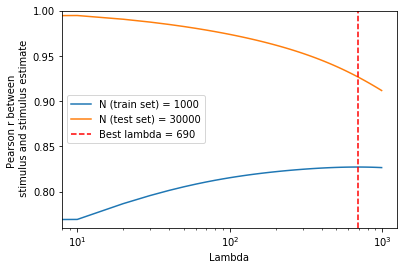

In [56]:
plt.plot(lam, rs, label = 'N (train set) = 1000')
plt.plot(lam, rs_train, label = 'N (test set) = 30000')
plt.axvline(x=lam[np.argmax(rs)], ls = '--', label ='Best lambda = {}'.format(lam[np.argmax(rs)]), color = 'red')
plt.legend()
plt.xlabel('Lambda')
plt.xscale('log')
plt.ylim(0.76, 1)
plt.ylabel('Pearson r between \n stimulus and stimulus estimate')

In [59]:
np.where(lam == 690)

(array([69]),)

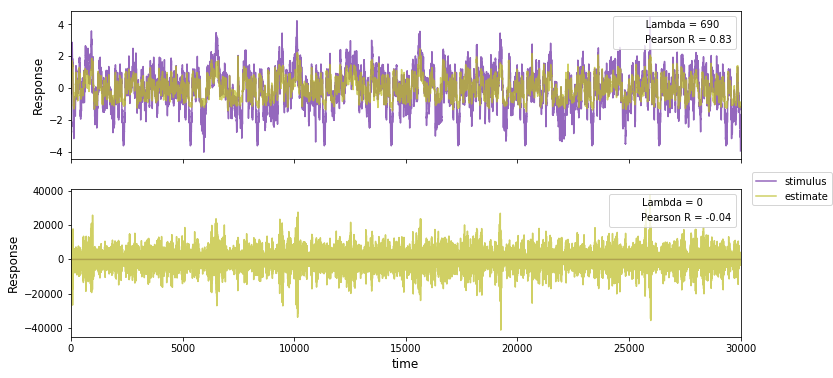

In [88]:
fig, ax = plt.subplots(2, 1, figsize = (12,6), sharex = True)
#fig.suptitle('True vs decoded stimulus', fontsize = 18)

ax[0].plot(stim[10000+tau:40000+tau], c = 'tab:purple')
ax[0].plot(np.dot(R_test, f_l[69]), alpha = 0.7, c = 'tab:olive')
ax[0].plot([], [], ' ', label="Pearson R = {:.2f}".format(rs[69]))

ax[1].plot(stim[10000+tau:40000+tau], c = 'tab:purple')
ax[1].plot(np.dot(R_test, f_l[0]), alpha = 0.7, c = 'tab:olive')
ax[1].plot([], [], ' ', label="Pearson R = {:.2f}".format(rs[0]))

ax[0].legend(title = '     Lambda = 690', loc = 1)
ax[1].legend(title = 'Lambda = 0', loc = 1)
ax[0].set_ylabel('Response', fontsize = 12)
ax[1].set_ylabel('Response', fontsize = 12)

ax[1].set_xlabel('time', fontsize = 12)
ax[0].set_xlim(0,30000)
fig.legend(['stimulus','estimate'],fontsize = 10, loc = 'center right', borderaxespad=0.1) 